<a href="https://colab.research.google.com/github/rezamohamadlo/Yogo-Pose-Estimation-With-Inceptionv3/blob/main/Yogo_Pose_Estimation_With_Inceptionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries and modules

import os                          # To interact with the operating system (e.g., for file paths)
import zipfile                     # To work with zip files (e.g., extracting image datasets)
import matplotlib.pyplot as plt    # For visualizing data (images, graphs, etc.)
import tensorflow as tf            # The core TensorFlow library
from tensorflow.keras import layers  # To define layers in a neural network
from tensorflow.keras import Model   # To create a Keras model
from tensorflow.keras.optimizers import RMSprop  # The RMSprop optimizer for training the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For augmenting image data
from tensorflow.keras.preprocessing.image import img_to_array, load_img  # To convert and load images for model input

In [2]:
# Using wget to download a zip file containing yoga pose images from the TensorFlow dataset.
# This command fetches the file from the provided URL and saves it in the current working directory.
!wget http://download.tensorflow.org/data/pose_classification/yoga_poses.zip

# Unzipping the downloaded yoga_poses.zip file into a directory named 'yoga_poses' under the /content folder.
# The -d option specifies the destination directory.
!unzip /content/yoga_poses.zip -d /content/yoga_poses


--2024-09-05 10:35:00--  http://download.tensorflow.org/data/pose_classification/yoga_poses.zip
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.20.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102517581 (98M) [application/zip]
Saving to: ‘yoga_poses.zip’

yoga_poses.zip      100%[===================>]  97.77M   105MB/s    in 0.9s    

2024-09-05 10:35:02 (105 MB/s) - ‘yoga_poses.zip’ saved [102517581/102517581]

Archive:  /content/yoga_poses.zip
  inflating: /content/yoga_poses/LICENSE  
   creating: /content/yoga_poses/test/
   creating: /content/yoga_poses/test/cobra/
  inflating: /content/yoga_poses/test/cobra/guy3_cobra105.jpg  
  inflating: /content/yoga_poses/test/cobra/guy3_cobra058.jpg  
  inflating: /content/yoga_poses/test/cobra/guy3_cobra117.jpg  
  inflating: /content/yoga_poses/test/cobra/guy3_cobra118.jpg  

In [3]:
# Defining the base directories for training and validation datasets
train_dir = '/content/yoga_poses/train'      # Directory path for training images
validation_dir = '/content/yoga_poses/test'  # Directory path for validation images

# Defining subdirectories for each yoga pose category in the training set
train_chair_dir   = os.path.join(train_dir, 'chair')   # Directory for chair pose images in training set
train_cobra_dir   = os.path.join(train_dir, 'cobra')   # Directory for cobra pose images in training set
train_dog_dir     = os.path.join(train_dir, 'dog')     # Directory for dog pose images in training set
train_tree_dir    = os.path.join(train_dir, 'tree')    # Directory for tree pose images in training set
train_warrior_dir = os.path.join(train_dir, 'warrior') # Directory for warrior pose images in training set

# Defining subdirectories for each yoga pose category in the validation set
validation_chair_dir   = os.path.join(validation_dir, 'chair')   # Directory for chair pose images in validation set
validation_cobra_dir   = os.path.join(validation_dir, 'cobra')   # Directory for cobra pose images in validation set
validation_dog_dir     = os.path.join(validation_dir, 'dog')     # Directory for dog pose images in validation set
validation_tree_dir    = os.path.join(validation_dir, 'tree')    # Directory for tree pose images in validation set
validation_warrior_dir = os.path.join(validation_dir, 'warrior') # Directory for warrior pose images in validation set

# Printing the number of images available in each yoga pose category for training
print(f"There are {len(os.listdir(train_chair_dir))} images of chairs for training.\n")
print(f"There are {len(os.listdir(train_cobra_dir))} images of cobras for training.\n")
print(f"There are {len(os.listdir(train_dog_dir))} images of dogs for training.\n")
print(f"There are {len(os.listdir(train_tree_dir))} images of trees for training.\n")
print(f"There are {len(os.listdir(train_warrior_dir))} images of warriors for training.\n")

# Printing the number of images available in each yoga pose category for validation
print(f"There are {len(os.listdir(validation_chair_dir))} images of chairs for validation.\n")
print(f"There are {len(os.listdir(validation_cobra_dir))} images of cobras for validation.\n")
print(f"There are {len(os.listdir(validation_dog_dir))} images of dogs for validation.\n")
print(f"There are {len(os.listdir(validation_tree_dir))} images of trees for validation.\n")
print(f"There are {len(os.listdir(validation_warrior_dir))} images of warriors for validation.\n")


There are 200 images of chairs for training.

There are 200 images of cobras for training.

There are 200 images of dogs for training.

There are 200 images of trees for training.

There are 200 images of warriors for training.

There are 84 images of chairs for validation.

There are 116 images of cobras for validation.

There are 90 images of dogs for validation.

There are 96 images of trees for validation.

There are 109 images of warriors for validation.



Sample dog image:


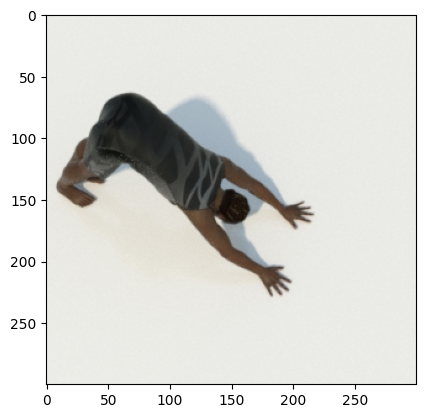


Sample cobra image:


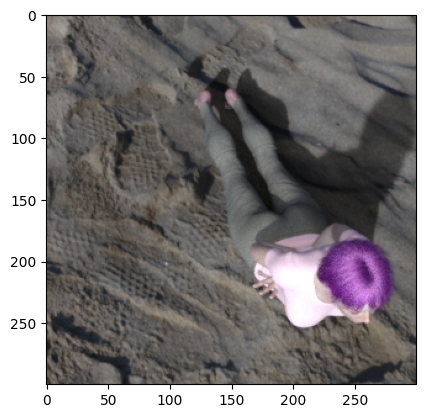


Sample chair image:


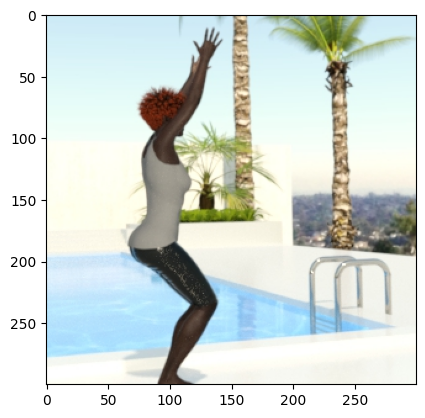


Sample tree image:


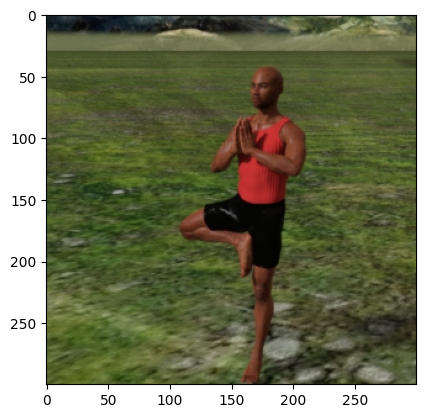


Sample warrior image:


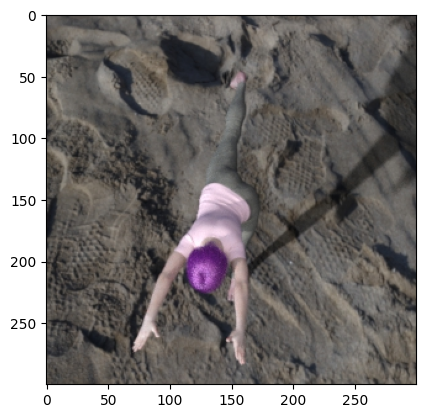

In [4]:
# Displaying a sample image of the 'dog' pose from the training dataset
print("Sample dog image:")
plt.imshow(load_img(f"{os.path.join(train_dog_dir, os.listdir(train_dog_dir)[0])}"))  # Load and display the first dog pose image
plt.show()  # Show the image in a new plot

# Displaying a sample image of the 'cobra' pose from the training dataset
print("\nSample cobra image:")
plt.imshow(load_img(f"{os.path.join(train_cobra_dir, os.listdir(train_cobra_dir)[0])}"))  # Load and display the first cobra pose image
plt.show()  # Show the image in a new plot

# Displaying a sample image of the 'chair' pose from the training dataset
print("\nSample chair image:")
plt.imshow(load_img(f"{os.path.join(train_chair_dir, os.listdir(train_chair_dir)[0])}"))  # Load and display the first chair pose image
plt.show()  # Show the image in a new plot

# Displaying a sample image of the 'tree' pose from the training dataset
print("\nSample tree image:")
plt.imshow(load_img(f"{os.path.join(train_tree_dir, os.listdir(train_tree_dir)[0])}"))  # Load and display the first tree pose image
plt.show()  # Show the image in a new plot

# Displaying a sample image of the 'warrior' pose from the training dataset
print("\nSample warrior image:")
plt.imshow(load_img(f"{os.path.join(train_warrior_dir, os.listdir(train_warrior_dir)[0])}"))  # Load and display the first warrior pose image
plt.show()  # Show the image in a new plot


In [5]:
# Load the first image from the 'chair' pose category in the training dataset
sample_image = load_img(f"{os.path.join(train_chair_dir, os.listdir(train_chair_dir)[0])}")

# Convert the loaded image into a numpy array
sample_array = img_to_array(sample_image)

# Print the shape of the numpy array representing the image
# This will show the dimensions of the image (height, width, number of color channels)
print(f"Each image has shape: {sample_array.shape}")


Each image has shape: (300, 300, 3)


In [6]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    """
    Creates and returns data generators for training and validation datasets.

    Parameters:
    - TRAINING_DIR: Directory path to the training dataset.
    - VALIDATION_DIR: Directory path to the validation dataset.

    Returns:
    - train_generator: Data generator for the training dataset.
    - validation_generator: Data generator for the validation dataset.
    """

    # Create an ImageDataGenerator instance for the training data
    # Rescale pixel values to the range [0, 1] by dividing by 255
    train_datagen = ImageDataGenerator(rescale=1./255.)

    # Create a data generator for the training data
    # Load images from the training directory, resize them to 150x150 pixels, and perform one-hot encoding for labels
    train_generator = train_datagen.flow_from_directory(
        directory=TRAINING_DIR,
        batch_size=32,             # Number of images to return in each batch
        class_mode='categorical',  # Multi-class classification
        target_size=(150, 150)     # Resize images to 150x150 pixels
    )

    # Create an ImageDataGenerator instance for the validation data
    # Rescale pixel values to the range [0, 1] by dividing by 255
    validation_datagen = ImageDataGenerator(rescale=1./255.)

    # Create a data generator for the validation data
    # Load images from the validation directory, resize them to 150x150 pixels, and perform one-hot encoding for labels
    validation_generator = validation_datagen.flow_from_directory(
        directory=VALIDATION_DIR,
        batch_size=32,             # Number of images to return in each batch
        class_mode='categorical',  # Multi-class classification
        target_size=(150, 150)     # Resize images to 150x150 pixels
    )

    # Return both data generators
    return train_generator, validation_generator


In [7]:
# Test the data generators by creating instances for the training and validation datasets
train_generator, validation_generator = train_val_generators(train_dir, validation_dir)


Found 1000 images belonging to 5 classes.
Found 495 images belonging to 5 classes.


In [8]:
# Download the pre-trained Inception v3 weights (excluding the top classification layer) from Google Cloud Storage
# The --no-check-certificate flag is used to bypass SSL certificate verification
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


--2024-09-05 10:35:09--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   122MB/s    in 0.7s    

2024-09-05 10:35:10 (122 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [9]:
# Import the InceptionV3 model from TensorFlow Keras applications
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Specify the path to the locally downloaded pre-trained weights file
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


In [10]:
def create_pre_trained_model(local_weights_file):
    """
    Creates an InceptionV3 model with pre-trained weights and sets it to non-trainable.

    Parameters:
    - local_weights_file: Path to the file containing pre-trained weights for InceptionV3.

    Returns:
    - pre_trained_model: An InceptionV3 model instance with loaded weights.
    """

    # Create an instance of the InceptionV3 model without the top classification layer
    # The input shape is set to (150, 150, 3) to match the resized image dimensions
    # weights=None specifies that we will load weights manually
    pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                    include_top=False,  # Exclude the top (classification) layer
                                    weights=None)      # Do not load pre-trained weights automatically

    # Load pre-trained weights into the InceptionV3 model
    pre_trained_model.load_weights(local_weights_file)

    # Set all layers of the model to be non-trainable
    # This means the weights in these layers will not be updated during training
    for layer in pre_trained_model.layers:
        layer.trainable = False

    return pre_trained_model


In [11]:
# Create the pre-trained InceptionV3 model with the specified weights and freeze all layers
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print a summary of the model architecture
# This includes the model's layers, their output shapes, and the number of parameters
pre_trained_model.summary()


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 74, 74, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 74, 74, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 74, 74, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 72, 72, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 72, 72, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 72, 72, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 72, 72, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 72, 72, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 72, 72, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 35, 35, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 35, 35, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 35, 35, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 33, 33, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 33, 33, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [12]:
# Count the total number of parameters in the model
total_params = pre_trained_model.count_params()

# Calculate the number of trainable parameters by summing the number of elements in each trainable weight tensor
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

# Print the total number of parameters in the model, formatted with commas for readability
print(f"There are {total_params:,} total parameters in this model.")

# Print the number of trainable parameters in the model, formatted with commas for readability
print(f"There are {num_trainable_params:,} trainable parameters in this model.")


There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [13]:
# Define a custom callback class to stop training when a specified accuracy threshold is reached
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        """
        Called at the end of each epoch.

        Parameters:
        - epoch: The index of the epoch that has just ended.
        - logs: A dictionary containing metrics at the end of the epoch.
        """
        # Check if the accuracy metric exceeds 99.9%
        if logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            # Stop the training process
            self.model.stop_training = True

In [14]:
def output_of_last_layer(pre_trained_model):
    """
    Retrieves and prints the output shape and tensor of the specified last layer in the pre-trained model.

    Parameters:
    - pre_trained_model: The model from which to extract the layer.

    Returns:
    - last_output: The output tensor of the specified last layer.
    """

    # Get the layer named 'mixed7' from the pre-trained model
    last_desired_layer = pre_trained_model.get_layer('mixed7')

    # Print the shape of the output from the 'mixed7' layer
    print('last layer output shape: ', last_desired_layer.output.shape)

    # Get the output tensor of the 'mixed7' layer
    last_output = last_desired_layer.output

    # Print the output tensor (this will display a tensor object, not the actual values)
    print('last layer output: ', last_output)

    return last_output

In [15]:
# Retrieve and print the output tensor of the 'mixed7' layer from the pre-trained model
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 768)
last layer output:  <KerasTensor shape=(None, 7, 7, 768), dtype=float32, sparse=False, name=keras_tensor_228>


In [16]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.src.models.functional.Functional'>


In [17]:
from tensorflow.keras.losses import CategoricalCrossentropy

def create_final_model(pre_trained_model, last_output):
    """
    Creates a final model by adding new layers on top of the pre-trained model.

    Parameters:
    - pre_trained_model: The pre-trained model to use as the base.
    - last_output: The output tensor from the last desired layer of the pre-trained model.

    Returns:
    - model: The final model with added layers and compilation.
    """

    # Flatten the output tensor from the last desired layer to prepare it for the dense layers
    x = layers.Flatten()(last_output)

    # Add a fully connected dense layer with 1024 units and ReLU activation function
    x = layers.Dense(1024, activation='relu')(x)

    # Add a dropout layer with a dropout rate of 20% to prevent overfitting
    x = layers.Dropout(0.2)(x)

    # Add the final dense layer with 5 units (for 5 classes) and softmax activation for multi-class classification
    x = layers.Dense(5, activation='softmax')(x)

    # Create a new Model instance with the pre-trained model's input and the newly added layers' output
    model = Model(inputs=pre_trained_model.input, outputs=x)

    # Compile the model with the RMSprop optimizer, categorical cross-entropy loss function, and accuracy metric
    model.compile(optimizer=RMSprop(learning_rate=0.0001),
                  loss=CategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model


In [18]:
# Create the final model by adding new layers on top of the pre-trained model
model = create_final_model(pre_trained_model, last_output)

# Count the total number of parameters in the final model
total_params = model.count_params()

# Calculate the number of trainable parameters by summing the number of elements in each trainable weight tensor
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

# Print the total number of parameters in the model, formatted with commas for readability
print(f"There are {total_params:,} total parameters in this model.")

# Print the number of trainable parameters in the model, formatted with commas for readability
print(f"There are {num_trainable_params:,} trainable parameters in this model.")


There are 47,516,581 total parameters in this model.
There are 38,541,317 trainable parameters in this model.


In [19]:
# Instantiate the custom callback that will stop training once 99.9% accuracy is reached
callbacks = myCallback()

# Train the final model using the training and validation data generators
# The training process will run for a maximum of 100 epochs or until the callback condition is met
history = model.fit(
    train_generator,                   # The training data generator
    validation_data=validation_generator,  # The validation data generator
    epochs=100,                        # Maximum number of epochs to train
    verbose=2,                         # Verbosity mode: 2 provides detailed logs per epoch
    callbacks=[callbacks]              # List of callbacks to apply during training
)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 - 35s - 1s/step - accuracy: 0.9130 - loss: 0.2804 - val_accuracy: 0.7919 - val_loss: 0.5184
Epoch 2/100

Reached 99.9% accuracy so cancelling training!
32/32 - 4s - 115ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.8343 - val_loss: 0.4146


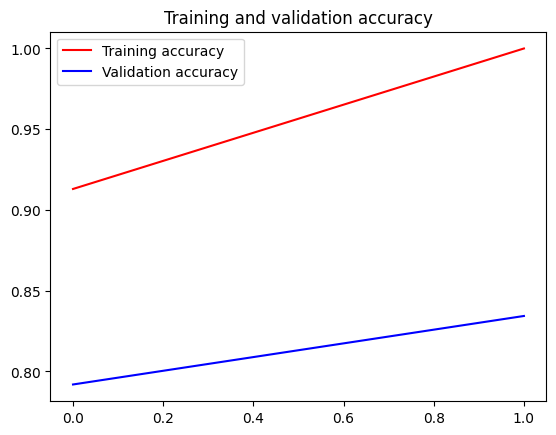

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()